In [1]:
import os, glob
import numpy as np
import pandas as pd
from scipy import stats
w_list= glob.glob("../result/merge_weather/*.csv")
pd.set_option('display.max_rows', 20)
# flowers = []
# for fn in get_f_list:
#     flowers.append(fn.split("\\")[-1].split("_")[0])

# flower = flowers[0]
# fn_list = glob.glob("../result/merge_flower_price/*" + flower + "*.csv")
w_list

['../result/merge_weather\\467480_嘉義.csv',
 '../result/merge_weather\\C0F9L0_后里.csv',
 '../result/merge_weather\\C0G650_員林.csv',
 '../result/merge_weather\\C0H960_草屯.csv',
 '../result/merge_weather\\C0K490_古坑.csv',
 '../result/merge_weather\\C0R590_里港.csv',
 '../result/merge_weather\\C0V360_內門.csv',
 '../result/merge_weather\\C0X060_下營.csv']

In [2]:
from datetime import date, time, datetime
from datetime import timedelta

fn_raw = w_list[0]
r_data = pd.read_csv(fn_raw, encoding="utf-8")
data_t_n = ['Temperature', 'RH', 'StnPres', 'WS', 'WSGust','d_tmp']
col_fix =  ['T.Max', 'T.Min', 'Precp','Temperature', 'RH', 'StnPres', 'WS', 'WSGust']
# rm "/"
for col in col_fix:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new
rain  = r_data['Precp']
# rain_class function
def rain_c(precp):
    rain_class=[0]
    rain_tag = ["no_rain", "rain"]
    result = 0
    for d in rain_class:
        if precp>d:
            result = result + 1
    return result

rain_class=[]
for precp in rain:
    rain_class.append(rain_c(precp))
# df_r["rain_class"]=rain_class
# print("0,<5,>5",np.bincount(rain_class))
d_tmp = r_data['T.Max'] - r_data['T.Min']
def to_zscore(df, col_x):
#     df_tmp = df
#     col = "Temperature"
    for col in col_x:
        df[col] = stats.zscore(df[col])
        df[col] = np.round(df[col], decimals=4)

d_data = r_data["Date"]
r_data["d_tmp"]= d_tmp
drop_c =["Date",'T.Max', 'T.Min', 'Precp']
r_data = r_data.drop(columns=drop_c)
r_data["rain"]= rain_class
to_zscore(r_data, data_t_n)



df_all = r_data.copy()
arr_all = np.array(df_all)
dfs =[]
shifts = 28
for i in range(1,shifts+1):
    df_s = r_data.copy()
    tp = np.array(df_s.shift(periods=i))
    arr_all = np.concatenate((arr_all, tp), axis=1)
# arr_all = np.concatenate((arr_all, np.array(date_info)),axis=1)
df_all = pd.DataFrame(arr_all)
df_all = df_all.dropna()
df_all = df_all.reset_index()
df_all = df_all.drop(columns="index")
d_data = d_data[:(-shifts)]
r_data = df_all



d_date = d_data[0]
def trans_to_y_w(d_date):
    year = year = int(d_date.split("-")[0])
    d_day = date(year,int(d_date.split("-")[1]), int(d_date.split("-")[2]))- date(year, 1, 1)
    d_w = 1+ (d_day.days // 7)
    if d_w ==53:
        d_w = 52
    result =  str(year) + "_" + str(d_w)
    
    if d_day.days % 7 ==6:
        return result
    else:
        return None
d_new = []
for i in range(len(d_data)):
    d_new.append(trans_to_y_w(d_data[i]))
r_data["y_w"] = d_new
r_data = r_data.dropna()
r_data



,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,y_w
6,-1.1321,-0.1532,-0.0390,0.6519,-0.7231,-0.7306,1.0,-0.2154,0.0078,-0.5366,...,2.0942,0.0,-1.1932,-0.6362,0.6817,-1.1611,-1.0329,1.7460,0.0,2014_1
13,-2.8230,0.6519,0.8189,1.7396,-0.1423,-2.0462,1.0,-2.7008,1.2960,0.5444,...,0.4303,0.0,-1.9470,0.1689,1.1450,2.9483,1.5613,-0.6532,0.0,2014_2
20,-0.7247,0.3299,0.4586,0.8936,0.8257,1.2816,0.0,-0.7654,-0.1532,0.9391,...,0.7399,0.0,-2.2526,-1.4413,1.4710,1.9814,1.6775,-0.1114,0.0,2014_3
27,-1.1932,0.1689,1.0935,-0.3150,-0.7618,1.2042,0.0,-1.2951,0.0078,1.3680,...,1.3977,0.0,-1.4988,0.3299,1.1106,-0.9193,-0.7618,1.5912,0.0,2014_4
34,-1.0099,0.0078,0.7332,0.1684,-0.3746,0.3142,0.0,-1.4173,0.1689,0.6988,...,-0.3436,0.0,-1.1321,-0.1532,-0.0390,0.6519,-0.7231,-0.7306,1.0,2014_5
41,-1.4784,1.6180,1.3852,-0.4359,-1.2652,-2.2010,1.0,-1.4988,-0.3142,1.4881,...,0.2368,0.0,-2.8230,0.6519,0.8189,1.7396,-0.1423,-2.0462,1.0,2014_6
48,-0.3172,0.1689,0.6130,-0.7985,-0.7618,0.8173,0.0,-0.6024,-0.4752,1.0592,...,-1.8140,1.0,-0.7247,0.3299,0.4586,0.8936,0.8257,1.2816,0.0,2014_7
55,-0.4395,-0.7972,0.4586,-0.5567,-0.9167,1.2429,0.0,-0.8062,0.3299,1.0420,...,1.1268,0.0,-1.1932,0.1689,1.0935,-0.3150,-0.7618,1.2042,0.0,2014_8
62,-0.7043,1.1350,-0.3478,0.8936,0.2062,-1.4658,0.0,-0.3172,0.8129,-0.3822,...,-0.1501,1.0,-1.0099,0.0078,0.7332,0.1684,-0.3746,0.3142,0.0,2014_9
69,-0.2969,0.4909,0.2699,-0.5567,-0.6457,0.5464,0.0,-0.6636,0.9740,0.6645,...,0.6238,1.0,-1.4784,1.6180,1.3852,-0.4359,-1.2652,-2.2010,1.0,2014_10


In [3]:
fn = "../result/flower_price_byweek/Anthurium_pbyweek.csv"
df_pbw = pd.read_csv(fn, encoding="utf-8")
drop_c = ["year", "week"]
df_pbw = df_pbw.drop(columns=drop_c)
# df_pbw
# len(df)
df_join = df_pbw.join(r_data.set_index("y_w"), on="y_w")
df_join = df_join.dropna()
df_join

,w_avg,w_sale,market,price_diff,y_w,0,1,2,3,4,...,193,194,195,196,197,198,199,200,201,202
1,14.103072,25593,台中,0.085380,2014_2,-2.8230,0.6519,0.8189,1.7396,-0.1423,...,0.2836,0.4303,0.0,-1.9470,0.1689,1.1450,2.9483,1.5613,-0.6532,0.0
2,14.160488,14032,台中,0.032712,2014_3,-0.7247,0.3299,0.4586,0.8936,0.8257,...,0.2062,0.7399,0.0,-2.2526,-1.4413,1.4710,1.9814,1.6775,-0.1114,0.0
3,16.297317,58657,台中,0.041383,2014_4,-1.1932,0.1689,1.0935,-0.3150,-0.7618,...,-0.6457,1.3977,0.0,-1.4988,0.3299,1.1106,-0.9193,-0.7618,1.5912,0.0
4,15.097317,5337,台中,0.103009,2014_5,-1.0099,0.0078,0.7332,0.1684,-0.3746,...,-0.8780,-0.3436,0.0,-1.1321,-0.1532,-0.0390,0.6519,-0.7231,-0.7306,1.0
5,13.350372,29492,台中,-0.278764,2014_6,-1.4784,1.6180,1.3852,-0.4359,-1.2652,...,-0.5682,0.2368,0.0,-2.8230,0.6519,0.8189,1.7396,-0.1423,-2.0462,1.0
6,8.097418,25507,台中,-0.400916,2014_7,-0.3172,0.1689,0.6130,-0.7985,-0.7618,...,1.4839,-1.8140,1.0,-0.7247,0.3299,0.4586,0.8936,0.8257,1.2816,0.0
7,10.874573,12242,台中,0.457979,2014_8,-0.4395,-0.7972,0.4586,-0.5567,-0.9167,...,-0.2972,1.1268,0.0,-1.1932,0.1689,1.0935,-0.3150,-0.7618,1.2042,0.0
8,15.038923,15056,台中,0.323477,2014_9,-0.7043,1.1350,-0.3478,0.8936,0.2062,...,-0.3746,-0.1501,1.0,-1.0099,0.0078,0.7332,0.1684,-0.3746,0.3142,0.0
9,12.649293,22691,台中,-0.116818,2014_10,-0.2969,0.4909,0.2699,-0.5567,-0.6457,...,-0.7231,0.6238,1.0,-1.4784,1.6180,1.3852,-0.4359,-1.2652,-2.2010,1.0
10,10.525304,32797,台中,-0.077224,2014_11,-0.2969,-0.6362,0.3557,-0.3150,-0.7231,...,-0.6457,0.1981,0.0,-0.3172,0.1689,0.6130,-0.7985,-0.7618,0.8173,0.0


In [4]:
d_t_dummy = ["market"]
date_info = pd.DataFrame()
for col in d_t_dummy:
    date_info[col] = df_join[col]
    dummy = pd.get_dummies(date_info[col])
    df_join = pd.concat([df_join, dummy], axis=1)
drop_c = ["market", "w_avg", "w_sale", "y_w"]
df_join = df_join.drop(columns=drop_c)
df_join

,price_diff,0,1,2,3,4,5,6,7,8,...,198,199,200,201,202,台中,台北,台南,彰化,高雄
1,0.085380,-2.8230,0.6519,0.8189,1.7396,-0.1423,-2.0462,1.0,-2.7008,1.2960,...,1.1450,2.9483,1.5613,-0.6532,0.0,1,0,0,0,0
2,0.032712,-0.7247,0.3299,0.4586,0.8936,0.8257,1.2816,0.0,-0.7654,-0.1532,...,1.4710,1.9814,1.6775,-0.1114,0.0,1,0,0,0,0
3,0.041383,-1.1932,0.1689,1.0935,-0.3150,-0.7618,1.2042,0.0,-1.2951,0.0078,...,1.1106,-0.9193,-0.7618,1.5912,0.0,1,0,0,0,0
4,0.103009,-1.0099,0.0078,0.7332,0.1684,-0.3746,0.3142,0.0,-1.4173,0.1689,...,-0.0390,0.6519,-0.7231,-0.7306,1.0,1,0,0,0,0
5,-0.278764,-1.4784,1.6180,1.3852,-0.4359,-1.2652,-2.2010,1.0,-1.4988,-0.3142,...,0.8189,1.7396,-0.1423,-2.0462,1.0,1,0,0,0,0
6,-0.400916,-0.3172,0.1689,0.6130,-0.7985,-0.7618,0.8173,0.0,-0.6024,-0.4752,...,0.4586,0.8936,0.8257,1.2816,0.0,1,0,0,0,0
7,0.457979,-0.4395,-0.7972,0.4586,-0.5567,-0.9167,1.2429,0.0,-0.8062,0.3299,...,1.0935,-0.3150,-0.7618,1.2042,0.0,1,0,0,0,0
8,0.323477,-0.7043,1.1350,-0.3478,0.8936,0.2062,-1.4658,0.0,-0.3172,0.8129,...,0.7332,0.1684,-0.3746,0.3142,0.0,1,0,0,0,0
9,-0.116818,-0.2969,0.4909,0.2699,-0.5567,-0.6457,0.5464,0.0,-0.6636,0.9740,...,1.3852,-0.4359,-1.2652,-2.2010,1.0,1,0,0,0,0
10,-0.077224,-0.2969,-0.6362,0.3557,-0.3150,-0.7231,0.9721,0.0,-0.1543,-0.4752,...,0.6130,-0.7985,-0.7618,0.8173,0.0,1,0,0,0,0


In [5]:
y_raw = np.array(df_join["price_diff"])
# y.describe()

def y_to_class(v):
    t = 0
    y_class_range = [-0.1, 0, 0.1]
    for i in range(len(y_class_range)):
        if (v >= y_class_range[i]):
            t = i+1
    return int(t)

y_class = []
for i in range(len(y_raw)):
    y_class.append(y_to_class(y_raw[i]))
print("freq:",np.bincount(y_class))
out_class_count = len(np.bincount(y_class))


freq: [1821 2254 2053 1901]


In [6]:
x = np.array(df_join.drop(columns="price_diff"))
y = y_class
input_d = x.shape[1]

In [7]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

model = Sequential()
layer_0 = Dense(units =800, input_dim = input_d,kernel_initializer = "random_normal",
                activation = "relu")
model.add(layer_0)
model.add(Dropout(0.25))
layer_1 = Dense(units =80,kernel_initializer = "random_normal", activation = "relu")
model.add(layer_1)
model.add(Dropout(0.25))
layer_out = Dense(units = out_class_count,kernel_initializer = "random_normal",
                  activation = "softmax")
model.add(layer_out)
model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               167200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                64080     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 324       
Total params: 231,604
Trainable params: 231,604
Non-trainable params: 0
_________________________________________________________________


In [8]:
import matplotlib
import matplotlib.pyplot as plt

model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(x = x_train, y = np_utils.to_categorical(y_train),
                          validation_split = 0.1, epochs =35, verbose = 2)

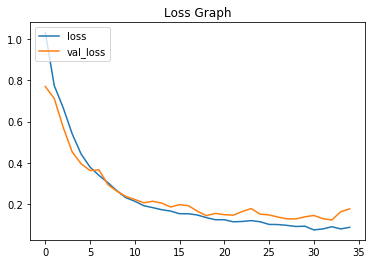

In [10]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [9]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3
0,153,4,1,2
1,3,213,3,4
2,1,4,222,1
3,0,0,6,186
